# Individual Neuron Development

In [1]:
import sys
sys.path.insert(0, '/Users/amilmerchant/NEST/install/lib/python2.7/site-packages')
import nest
import pylab
import math

In [2]:
nest.ResetKernel()
nest.SetKernelStatus({"local_num_threads": 4})
nest.SetKernelStatus({"resolution": 0.2})

In [3]:
e_dict = {'V_m': -55.,
          'V_th': -50.,
          'V_peak': 0.,
          'V_reset': -55.,
          'C_m': 500.,
          'g_L': 25.,
          'E_L':-70.,
          'E_rev': [0., -70., 0.],
          'tau_rise' : [0.2, 0.2, 2.],
          'tau_decay' : [2., 5., 100.],
          'a' : 0.,
          'b' : 0.,
          'Delta_T' : 0.,
          'tau_w' : 1000.,
          't_ref' : 2.
         }

In [4]:
i_dict = {'V_m' : -55.,
          'V_th': -50.,
          'V_peak': 0.,
          'V_reset': -55.,
          'C_m': 200.,
          'g_L': 20.,
          'E_L':-70.,
          'E_rev': [0., -70., 0.],
          'tau_rise' : [0.2, 0.2, 2.],
          'tau_decay' : [2., 5., 100.],
          'a' : 0.,
          'b' : 0.,
          'Delta_T' : 0.,
          'tau_w' : 1000.,
          't_ref' : 1.
         }

In [5]:
N_e = 1600
N_i = 400

Cxe = nest.Create("aeif_cond_beta_multisynapse", N_e, e_dict)
Cxi = nest.Create("aeif_cond_beta_multisynapse", N_i, i_dict)


Cxe_L = Cxe[1360:1600]
Cxe_R = Cxe[1120:1360]
Cxe_non = Cxe[:1120]

In [6]:
N_cd = 250 #250 GABAergic neurons for each population
CD_L = nest.Create("aeif_cond_beta_multisynapse", N_cd, e_dict)
CD_R = nest.Create("aeif_cond_beta_multisynapse", N_cd, e_dict)

N_snr = 250 #250 GABAergic neurons for each population
SNr_L = nest.Create("aeif_cond_beta_multisynapse", N_snr, e_dict)
SNr_R = nest.Create("aeif_cond_beta_multisynapse", N_snr, e_dict)

In [7]:
N_sce = 250 #250 GABAergic neurons for each population
SCe_L = nest.Create("aeif_cond_beta_multisynapse", N_sce, e_dict)
SCe_R = nest.Create("aeif_cond_beta_multisynapse", N_sce, e_dict)

N_sci = 250
SCi = nest.Create("aeif_cond_beta_multisynapse", N_sci, i_dict)

## Synapses

In [8]:
nest.CopyModel("static_synapse", "eAMPA", 
               {"weight": 1.0, 'receptor_type': 1,  'delay' : 0.5})
nest.CopyModel("static_synapse", "eGABA", 
               {"weight": 1.0, 'receptor_type': 2, 'delay': 0.5})
nest.CopyModel("static_synapse", "eNMDA", 
               {"weight": 1.0, 'receptor_type': 3, 'delay': 0.5})

In [9]:
cor_back = nest.Create('poisson_generator', 1, {'rate': 2400.})

parrot_cxe = nest.Create('parrot_neuron', 1600)
parrot_cxi = nest.Create('parrot_neuron', 400)

conn_dict = {'rule': 'all_to_all'}

nest.Connect(cor_back, parrot_cxe, conn_dict, {'model': 'static_synapse'})
nest.Connect(cor_back, parrot_cxi, conn_dict, {'model': 'static_synapse'})

In [10]:
correction = (1 + 1 * math.exp(-0.062 * -55) / 3.57)
print correction

w_plus = 1.7
f = float(len(Cxe_L)) /len(Cxe)
w_minus = 1 - f * (w_plus - 1) / (1 - f)

9.47765945641


In [11]:
nest.Connect(parrot_cxe, Cxe, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 2.1})
#nest.Connect(parrot_cxe, Cxe, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_cxi, Cxi, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 1.62 })
#nest.Connect(parrot_cxi, Cxi, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.13 / correction})

### External Connections

In [12]:
nest.Connect(Cxe_L, SCe_L, conn_dict, {'model': 'eAMPA', 'weight': 3.5})
nest.Connect(Cxe_R, SCe_R, conn_dict, {'model': 'eAMPA', 'weight': 3.5})

# 0.8 - 4.6 depending on the model
nest.Connect(Cxe_L, CD_L, conn_dict, {'model': 'eAMPA', 'weight': 0.8})
nest.Connect(Cxe_R, CD_R, conn_dict, {'model': 'eAMPA', 'weight': 0.8})

### Internal Connections

In [13]:
nest.Connect(Cxe_L, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 0.085})
nest.Connect(Cxe_R, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 0.085})

nest.Connect(Cxe_L, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.2805 / correction })
nest.Connect(Cxe_R, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.2805 / correction})

nest.Connect(Cxe, Cxi, conn_dict, {'model': 'eAMPA', 'weight': 0.04 })
nest.Connect(Cxe, Cxi, conn_dict, {'model': 'eNMDA', 'weight': 0.13 / correction })

nest.Connect(Cxe_L, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_R, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})

nest.Connect(Cxe_L, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })
nest.Connect(Cxe_R, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })

nest.Connect(Cxe_L, Cxe_non, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(Cxe_L, Cxe_non, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })

nest.Connect(Cxe_R, Cxe_non, conn_dict, {'model': 'eAMPA', 'weight': 0.05 })
nest.Connect(Cxe_R, Cxe_non, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })

nest.Connect(Cxe_non, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_non, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })

nest.Connect(Cxe_non, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_non, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })

nest.Connect(Cxe_non, Cxe_non, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(Cxe_non, Cxe_non, conn_dict, {'model': 'eNMDA', 'weight': 0.165/ correction })

nest.Connect(Cxi, Cxe, conn_dict, {'model': 'eGABA', 'weight': 1.3 })
nest.Connect(Cxi, Cxi, conn_dict, {'model': 'eGABA', 'weight': 1.0 })

In [14]:
coherence = 12.8

u_a_factor = 60
u_b_factor = 20

u_a = 20 + u_a_factor * coherence / 100.
u_b = 40 - u_b_factor * coherence / 100.


input_left = nest.Create('poisson_generator', 1, {'rate': u_a})
input_right = nest.Create('poisson_generator', 1, {'rate': u_b})

nest.Connect(input_left, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 2.1 })
nest.Connect(input_right, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 2.1 })

# Basal Ganglia

### Internal Connections

In [15]:
nest.Connect(CD_L, SNr_L, conn_dict, {'model': 'eGABA', 'weight': 0.6})
nest.Connect(CD_R, SNr_R, conn_dict, {'model': 'eGABA', 'weight': 0.6})

### External Connections

In [16]:
nest.Connect(SNr_L, SCe_L, conn_dict, {'model': 'eGABA', 'weight': 2.5})
nest.Connect(SNr_R, SCe_R, conn_dict, {'model': 'eGABA', 'weight': 2.5})

In [17]:
# Create Poisson Inputs for the CD and SNr neurons

In [18]:
bg_back = nest.Create('poisson_generator', 1, {'rate': 1200.})

parrot_cdl = nest.Create('parrot_neuron', 250)
parrot_cdr = nest.Create('parrot_neuron', 250)
parrot_snrl = nest.Create('parrot_neuron', 250)
parrot_snrr = nest.Create('parrot_neuron', 250)

conn_dict = {'rule': 'all_to_all'}

nest.Connect(bg_back, parrot_cdl, conn_dict, {'model': 'static_synapse'})
nest.Connect(bg_back, parrot_cdr, conn_dict, {'model': 'static_synapse'})
nest.Connect(bg_back, parrot_snrl, conn_dict, {'model': 'static_synapse'})
nest.Connect(bg_back, parrot_snrr, conn_dict, {'model': 'static_synapse'})

In [19]:
nest.Connect(parrot_cdl, CD_L, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 1.6})
#nest.Connect(parrot_cdl, CD_L, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_cdr, CD_R, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 1.6})
#nest.Connect(parrot_cdr, CD_R, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_snrl, SNr_L, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 13.76})
#nest.Connect(parrot_snrl, SNr_L, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_snrr, SNr_R, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 13.76})
#nest.Connect(parrot_snrr, SNr_R, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

# Superior Colliculus

In [20]:
nest.Connect(SCe_L, SCe_L, conn_dict, {'model': 'eNMDA', 'weight': 1.5 / correction })
nest.Connect(SCe_R, SCe_R, conn_dict, {'model': 'eNMDA', 'weight': 1.5 / correction })

nest.Connect(SCe_L, SCi, conn_dict, {'model': 'eNMDA', 'weight': 0.7 / correction })
nest.Connect(SCe_R, SCi, conn_dict, {'model': 'eNMDA', 'weight': 0.7 / correction })

nest.Connect(SCe_L, Cxi, conn_dict, {'model': 'eNMDA', 'weight': 0.11 / correction })
nest.Connect(SCe_R, Cxi, conn_dict, {'model': 'eNMDA', 'weight': 0.11 / correction })

nest.Connect(SCe_L, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.05 / correction })
nest.Connect(SCe_R, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.05 / correction })

# Include short term facilitation
nest.Connect(SCi, SCe_L, conn_dict, {'model': 'eGABA', 'weight': 2.5})
nest.Connect(SCi, SCe_R, conn_dict, {'model': 'eGABA', 'weight': 2.5})

In [21]:
# Create Poisson Inputs for the CD and SNr neurons

In [22]:
sc_back = nest.Create('poisson_generator', 1, {'rate': 1200.})

parrot_scel = nest.Create('parrot_neuron', 250)
parrot_scer = nest.Create('parrot_neuron', 250)
parrot_sci = nest.Create('parrot_neuron', 250)

nest.Connect(sc_back, parrot_scel, conn_dict, {'model': 'static_synapse'})
nest.Connect(sc_back, parrot_scer, conn_dict, {'model': 'static_synapse'})
nest.Connect(sc_back, parrot_sci, conn_dict, {'model': 'static_synapse'})

In [23]:
nest.Connect(parrot_scel, SCe_L, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 0.4864})
#nest.Connect(parrot_cdl, CD_L, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_scer, SCe_R, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 0.4864})
#nest.Connect(parrot_cdr, CD_R, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_sci, SCi, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 0})
#nest.Connect(parrot_snrl, SNr_L, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})


# Run the Model

In [24]:
multis = []
for i in Cxe:
    multimeter = nest.Create("multimeter")
    multis.append(multimeter)
    nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
    nest.Connect(multimeter, [i])

spikedetector = nest.Create("spike_detector",
                params={"withgid": True, "withtime": True})
nest.Connect(Cxe, spikedetector)

In [25]:
import nest.raster_plot

pops = [Cxe_L, Cxe_R, Cxe, Cxi, CD_L, CD_R, SNr_L, SNr_R, SCe_L, SCe_R, SCi]
sds = []
for i in range(len(pops)):
    sds.append(nest.Create("spike_detector",
                params={"withtime": True}))
    nest.Connect(pops[i], sds[i])

In [26]:
import time
start = time.time()
nest.Simulate(800.0)
end = time.time()
print end - start

27.1773388386


-59.0881277894
-59.3373369701


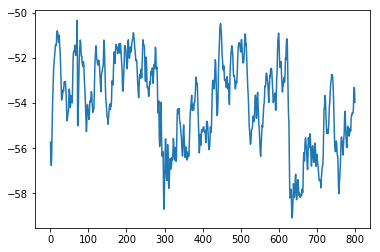

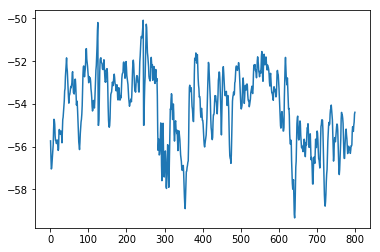

In [27]:
import pylab
for i in range(2): 
    dmm = nest.GetStatus(multis[i])[0]
    Vms = dmm["events"]["V_m"]
    ts = dmm["events"]["times"]
    pylab.ion()
    pylab.figure(i+1)
    pylab.plot(ts, Vms)
    print min(Vms)

SCe_R 0 fires


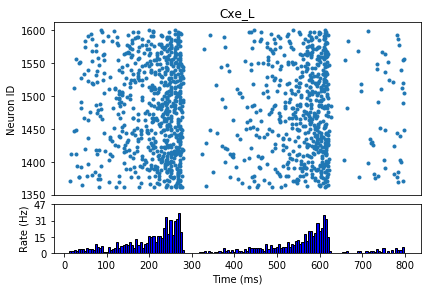

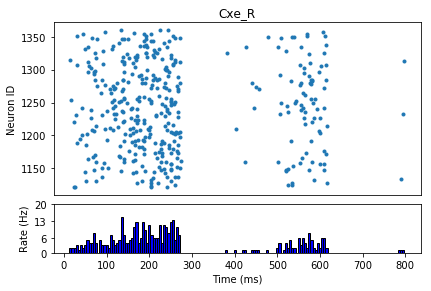

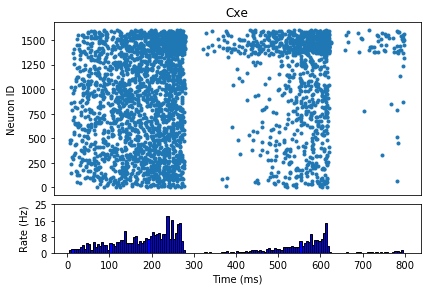

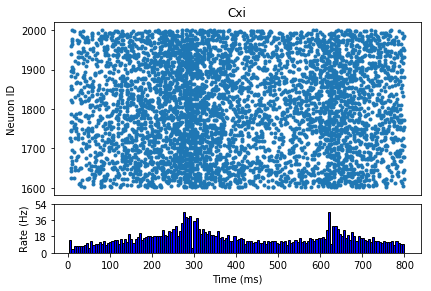

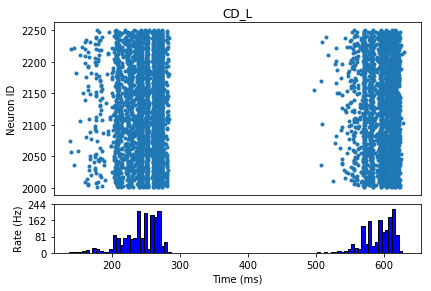

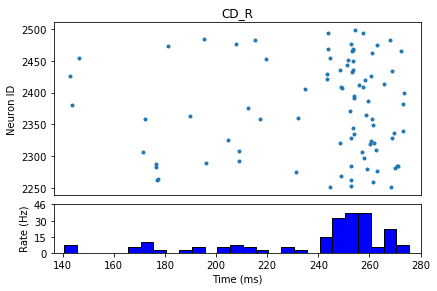

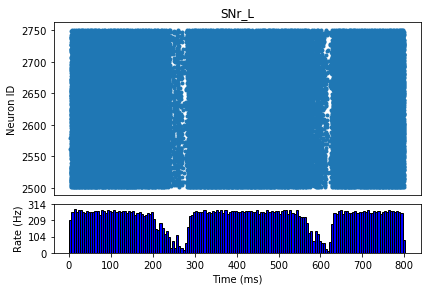

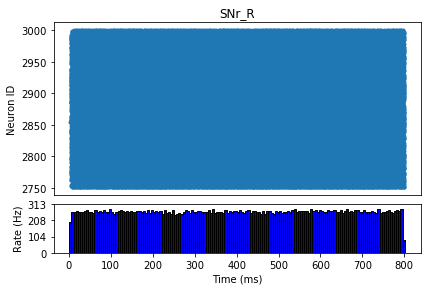

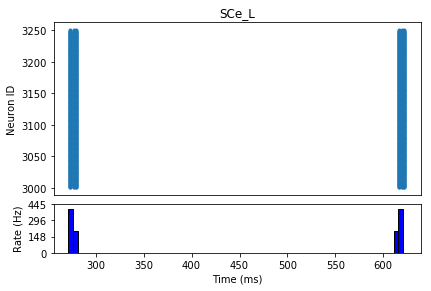

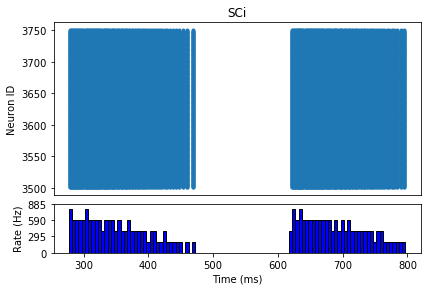

In [28]:
names = ["Cxe_L", "Cxe_R", "Cxe", "Cxi", "CD_L", "CD_R", "SNr_L", "SNr_R", "SCe_L", "SCe_R", "SCi"]
for i in range(len(sds)):
    dSD = nest.GetStatus(sds[i],keys="events")[0]
    if len(dSD['senders']) == 0:
        print names[i], "0 fires"
    else:
        nest.raster_plot.from_device(sds[i], hist=True, hist_binwidth=5.,
                                 title=names[i])